<img src="https://github.com/YongBeomKim/nltk_rnd/raw/master/data/test.jpg">

<br></br>
# **Project4 | word2vec**


## **1 데이터 전처리**

In [1]:
! apt-get update
! apt-get install g++ openjdk-8-jdk 
! pip3  install  nltk konlpy wordcloud matplotlib gensim 

! apt-get install fonts-nanum*
! apt-get install fontconfig
! fc-cache -fv
! cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
! rm -rf /content/.cache/matplotlib/*

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1710/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
openjdk-8-jdk is already the newest version (8u181-b13-1ubuntu0.18.04.1).
0 upgraded, 0 newly installe

In [0]:
speech_text = "https://raw.githubusercontent.com/YongBeomKim/nltk_tutorial/master/data/pyongyang_fin.txt"
script_text = "https://raw.githubusercontent.com/YongBeomKim/nltk_tutorial/master/data/movie_memories_of_murder_2003.txt"
font_file = "/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/NanumGothicCoding.ttf"

In [0]:
# 텍스트를 줄단위로 끊어서 불러온뒤
# Token 단위로, 한글명사들을 추출한다
def txtnoun(sentences , skip=False, tags=['Noun'], stem=True, set_tokens=False):
    import re
    from konlpy.tag import Okt
    twitter = Okt()
    result  = []
    sentences = sentences.replace('\n', '\n|')
    sentences = sentences.split('|')
    for content in sentences:
        texts      = content.replace('\n', '') # 해당줄의 줄바꿈 내용 제거
        tokenizer  = re.compile(r'[^ ㄱ-힣]+')  # 한글과 띄어쓰기를 제외한 모든 글자를 선택
        token_data = tokenizer.sub('', texts)  # 한글과 띄어쓰기를 제외한 모든 부분을 제거
        token_data = token_data.split(' ')
        sentence   = []

        for token in token_data:
            # skip 대상이 없을 떄
            if skip == False:
                chk_tok = twitter.pos(token, stem=stem)
                chk_tok = [temp[0]  for temp in chk_tok   if temp[1] in tags]
                ckeck   = "".join(chk_tok)
                if len(ckeck) > 1:
                    sentence.append(ckeck)

            # skip 내용이 있을 때
            else:
                if token.strip() in skip.keys():
                    result.append(skip[token.strip()])
                else:
                    chk_tok = twitter.pos(token, stem=stem)
                    chk_tok = [temp[0] for temp in chk_tok if temp[1] in tags]
                    ckeck   = "".join(chk_tok)

                    # 전처리가 끝난 결과가 skip에 해당여부 판단
                    if ckeck.strip() in skip.keys():
                        result.append(skip[ckeck.strip()])
                    elif len(ckeck) > 1:
                        sentence.append(ckeck)

        # 단락별 작업이 끝난 뒤 '\n'를 덧붙여서 작업을 종료
        temp = "".join(sentence)
        if len(temp) > 1:
            sentence = " ".join(sentence)
            sentence += "\n"
            result.append(sentence)

    if set_tokens == True:
        from nltk.tokenize import word_tokenize
        set_token = word_tokenize(" ".join(result))
        return list(set(set_token))

    else:
        return " ".join(result)

In [0]:
skips = {'두만':'박두만', '태윤':'서태윤', '용구':'조용구', '귀옥':'권귀옥', 
         '희봉':'구희봉', '동철':'신동철', '광호':'백광호', '병순':'조병순', 
         '해일':'박해일', '광호의':'백광호', '백광호의':'백광호'}

In [5]:
import requests
sentences = requests.get(script_text).text
sentences[:300]

'박두만\n서태윤\n조용구\n권귀옥\n구희봉\n신동철\n백광호20대 초반. 정박아\n조병순30대 후반. 변태성향\n박해일20대 초반. 공장 노동자. ‘유력한 용의자’.\n선본 남자, 동네 양아치들... 등등\n30대 초반의 전직 간호조무사, 마을 ‘야매주사’ 여인.\n안송여중 1학년 학생\n소현의 단짝 친구\n박보희, 이향숙, 독고현순, 박명자, 안미선.\n화면 가득 한 남자 아이의 얼굴이 보여진다.\n쏟아지는 햇살 아래, 맑은 눈빛의 아이는 카메라 정면을 응시하고 있다.\n아이는 코스모스 위에 앉아있는 잠자리를 향해 살며시 손을 뻗는다.\n휙~ 잠자리가 날아가 '

In [0]:
sentences   = txtnoun(sentences, skip=skips, tags=['Noun'])
script_file = 'script.txt'
with open(script_file, 'w', encoding='utf-8') as file:
    file.write(sentences)

In [7]:
%%time
from gensim.models import word2vec
data  = word2vec.LineSentence(script_file)
model = word2vec.Word2Vec(data, size=30, window=2, min_count=10, 
                          hs=1, workers=4, iter=100, sg=1)
model_file = "script.model"
model.save(model_file)

CPU times: user 1.61 s, sys: 114 ms, total: 1.73 s
Wall time: 1.76 s


In [8]:
# 저장된 학습모델파일 불러오기
model = word2vec.Word2Vec.load(model_file)
len(model.wv.vocab.keys())

151

In [9]:
list(model.wv.index2word)

['서태윤',
 '얼굴',
 '박두만',
 '여자',
 '조용구',
 '백광호',
 '박해일',
 '계속',
 '순간',
 '반장',
 '모습',
 '소현',
 '소리',
 '하나',
 '시작',
 '사람',
 '범인',
 '남자',
 '표정',
 '형사',
 '다시',
 '뭔가',
 '지금',
 '고개',
 '잠시',
 '아이',
 '눈빛',
 '설영',
 '보고',
 '여기',
 '얘기',
 '동네',
 '화면',
 '시체',
 '시선',
 '사진',
 '한번',
 '서류',
 '위로',
 '책상',
 '그림자',
 '새끼',
 '멀리',
 '점점',
 '머리',
 '갑자기',
 '이향숙',
 '문득',
 '사건',
 '발자국',
 '자기',
 '가운데',
 '당신',
 '아래',
 '박두',
 '불빛',
 '괴남자',
 '권귀옥',
 '진짜',
 '저기',
 '스타킹',
 '그냥',
 '목소리',
 '사무실',
 '모두',
 '운동화',
 '우리',
 '사이',
 '용의자',
 '현장',
 '조그만',
 '장님',
 '전경',
 '기차',
 '마주',
 '취조실',
 '바로',
 '발견',
 '임마',
 '잠깐',
 '다른',
 '자리',
 '박명자',
 '거기',
 '음악',
 '부분',
 '시점',
 '간다',
 '그거',
 '끄덕',
 '버럭',
 '우산',
 '변소',
 '어디',
 '정말',
 '잔뜩',
 '다리',
 '그대로',
 '똑바로',
 '생각',
 '서서히',
 '가득',
 '인상',
 '후레쉬',
 '너머',
 '순경',
 '저녁',
 '경찰',
 '훈련',
 '언덕',
 '구희봉',
 '카메라',
 '주위',
 '브래지어',
 '분위기',
 '아저씨',
 '구석',
 '피해자',
 '그게',
 '팬티',
 '누군가',
 '라디오',
 '의경',
 '방송',
 '빗줄기',
 '어둠속',
 '인부',
 '조병순',
 '유전자',
 '바람',
 '서로',
 '주변',
 '참깨밭',
 '근처',
 '듯이',
 '가방',
 '코피',
 '휴

<br></br>
## **4 Word2Vec 모델 내용 확인**
모델을 활용하여 유력한 범인을 찾아보자!!

<img src="./data/test.jpg" width='800'>

In [10]:
# 범인과 관련된 내용 중 사람이름이 안나옴...
model.wv.most_similar('범인', topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('우리', 0.7886730432510376),
 ('얘기', 0.6760802268981934),
 ('변소', 0.668979287147522),
 ('그냥', 0.6410938501358032),
 ('거기', 0.55708247423172),
 ('우산', 0.5369104146957397),
 ('당신', 0.5343594551086426),
 ('사건', 0.5269545912742615),
 ('학교', 0.520767331123352),
 ('그거', 0.5149930119514465)]

In [11]:
# 현장과 가장 가깝게 등장한 인물이 1명 등장
model.wv.most_similar('현장', topn=30)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('사진', 0.6999064683914185),
 ('사건', 0.6996743679046631),
 ('용의자', 0.6884362101554871),
 ('참깨밭', 0.6351531744003296),
 ('이향숙', 0.6337133646011353),
 ('시점', 0.5667739510536194),
 ('자신', 0.5631481409072876),
 ('얼굴', 0.5505149960517883),
 ('박명자', 0.5487833023071289),
 ('서류', 0.5407856702804565),
 ('동네', 0.5349427461624146),
 ('빗물', 0.5308415293693542),
 ('경찰', 0.5267091393470764),
 ('바로', 0.5160379409790039),
 ('이건', 0.4960482120513916),
 ('발자국', 0.48361098766326904),
 ('보고', 0.4778910279273987),
 ('순경', 0.47264692187309265),
 ('듯이', 0.4719063639640808),
 ('카메라', 0.4597555994987488),
 ('근처', 0.44851255416870117),
 ('전경', 0.4464603066444397),
 ('후레쉬', 0.4234921932220459),
 ('위로', 0.4214373826980591),
 ('백광호', 0.4058763086795807),
 ('운동화', 0.4010370373725891),
 ('잔뜩', 0.39954012632369995),
 ('저녁', 0.3994610011577606),
 ('뭔가', 0.3954169750213623),
 ('그대로', 0.39448338747024536)]

In [12]:
# 현장 과 백광호 와 밀접한 증거들 중에 방해가 되는 내용을 찾는다
model.wv.most_similar(['현장','백광호'], topn=20)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('얼굴', 0.7750115394592285),
 ('사진', 0.7544788718223572),
 ('용의자', 0.7385113835334778),
 ('사건', 0.6294122338294983),
 ('참깨밭', 0.6272547841072083),
 ('이향숙', 0.6143202185630798),
 ('시점', 0.5956884622573853),
 ('이건', 0.5721720457077026),
 ('발자국', 0.5672428011894226),
 ('박두만', 0.5496323108673096),
 ('뭔가', 0.5367729663848877),
 ('조용구', 0.5360742211341858),
 ('그대로', 0.5333444476127625),
 ('듯이', 0.5244333744049072),
 ('총구', 0.518619179725647),
 ('서류', 0.5081196427345276),
 ('자신', 0.5071927905082703),
 ('보고', 0.4959295988082886),
 ('똑바로', 0.4866955280303955),
 ('전경', 0.4855080246925354)]

In [13]:
# 현장 과 백광호 와 밀접한 증거들 중에 '참깨밭' 이 계속 방해가 됨
# 참깨밭에 백광호가 밀접하게 연결되어 있어서 이를 제외한 분석이 필요
model.wv.most_similar(['현장','백광호'], negative=['참깨밭'], topn=20)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('얼굴', 0.7826732993125916),
 ('똑바로', 0.6800731420516968),
 ('용의자', 0.6487339735031128),
 ('사진', 0.6282622814178467),
 ('아래', 0.544635534286499),
 ('시점', 0.5417014360427856),
 ('눈빛', 0.527199387550354),
 ('보고', 0.5262603163719177),
 ('그대로', 0.5228623151779175),
 ('총구', 0.5135632157325745),
 ('인부', 0.49444302916526794),
 ('다리', 0.4799462556838989),
 ('구희봉', 0.4775776267051697),
 ('조용구', 0.4762415587902069),
 ('서류', 0.476196825504303),
 ('빗물', 0.46337082982063293),
 ('박두만', 0.45814788341522217),
 ('서태윤', 0.4510514736175537),
 ('가득', 0.43810519576072693),
 ('박해일', 0.4261661469936371)]

<br></br>
## **5 Visulaization**
gensim

In [14]:
vocab = list(model.wv.vocab)
X        = model[vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [0]:
from sklearn.manifold import TSNE
tsne    = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(X)

In [16]:
import pandas as pd
df = pd.DataFrame(X_tsne, 
                  index   = vocab, 
                  columns = ['x', 'y'])
df.head()

,x,y
박두만,-1.001242,2.197272
서태윤,-0.128083,1.784594
조용구,-0.506354,2.947770
권귀옥,-0.633408,4.136950
구희봉,-0.756728,4.821612


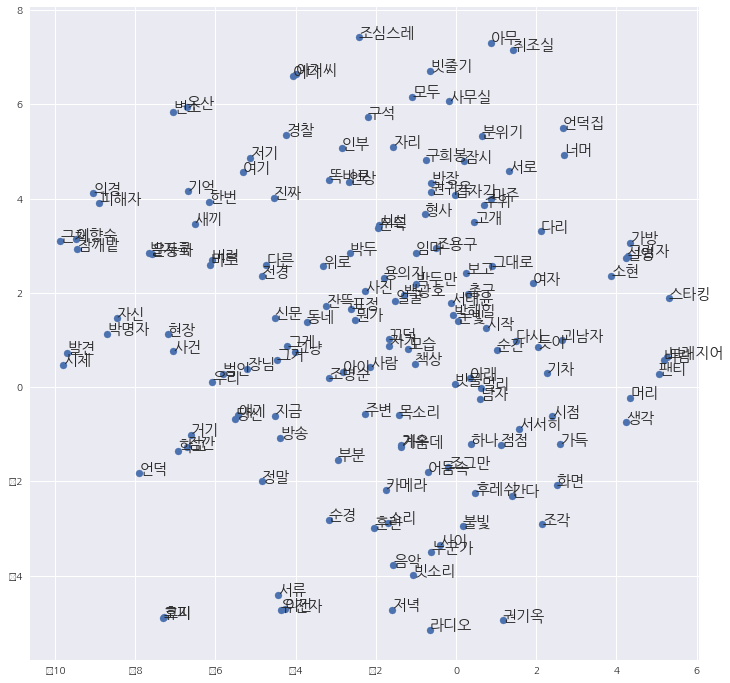

In [17]:
%matplotlib inline
import matplotlib
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family='NanumGothic')

import matplotlib.pyplot as plt
fig  = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=15)
plt.grid(True)

<br></br>
## **6 결과의 해석 및 활용**
1. 유사관계, 반대관계로 **출력된 모든 Token들이 가치가 있지는 않다**
1. **min_count, Vector 갯수** 2가지 조건만 사용하여 모델을 생성한다
1. Word2Vec 도 **문서를 분석하는 도구**에 불과 (절대적 **가치를 창출하는 기법** 으로 오해 X)
1. 해당 분야의 **잘 정리된 Document로 학습한 Word2Vec 모델** 에서 **유의미 한 token 들의 관계** 를 Template으로 잘 정리
1. 분석대상 문서를 **유사한 조건으로 word2vec 모델** 을 만들고, **앞에서 정리된 Template와** 비교하여 결과
다듬기
1. 시나리오의 분석 경우
    1. 결과물 중 인물의 Token 만 활용하여 분석
    1. 결과물 중 증거물의 Token 만 활용하여 분석
    1. 결과물 중 장소의 Token 만 활용하여 분석

In [0]:
# model 에 등장하는 인물들
charator = ["박두만", "서태윤", "조용구", "권귀옥", "구희봉", "신동철", "백광호",
            "조병순", "박해일", "박보희", "이향숙", "독고현순", "박명자", "안미선", 
            "반장", "소현", "범인", "형사", '괴남자', '순경','피해자', '권기옥','용의자']

In [0]:
# model 에 등장하는 장소명 들
area = ['현장', '사무실', '취조실', '변소', '참깨밭', '빗줄기', '어둠속', '언덕집']

In [0]:
# model 에 등장하는 Item 들
items = ['브래지어', '팬티', '우산', '운동화', '스타킹', '목소리', '불빛', '음악', '후레쉬', 
         '카메라', '라디오', '방송', '유전자', '가방', '코피', '휴지', '신문', '총구']